In [1]:
import pandas as pd

# Load the dataset
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()

# Display the first few rows of the dataset
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(None,
    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V2

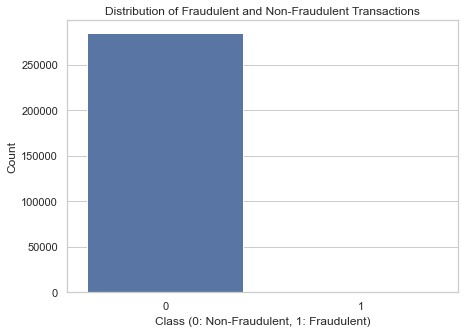

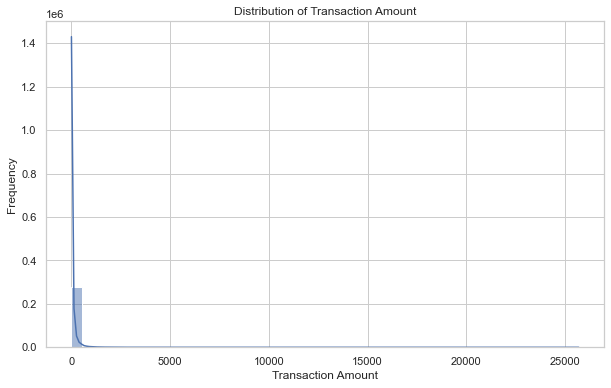

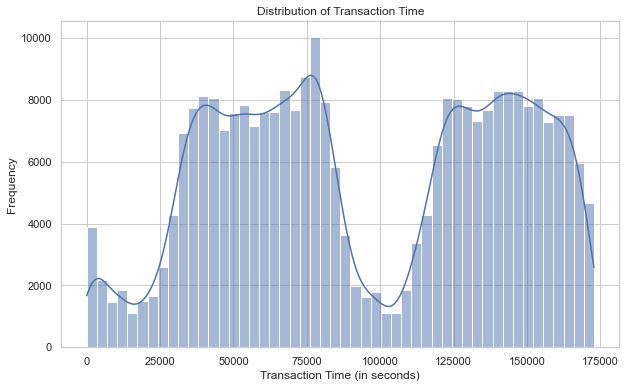

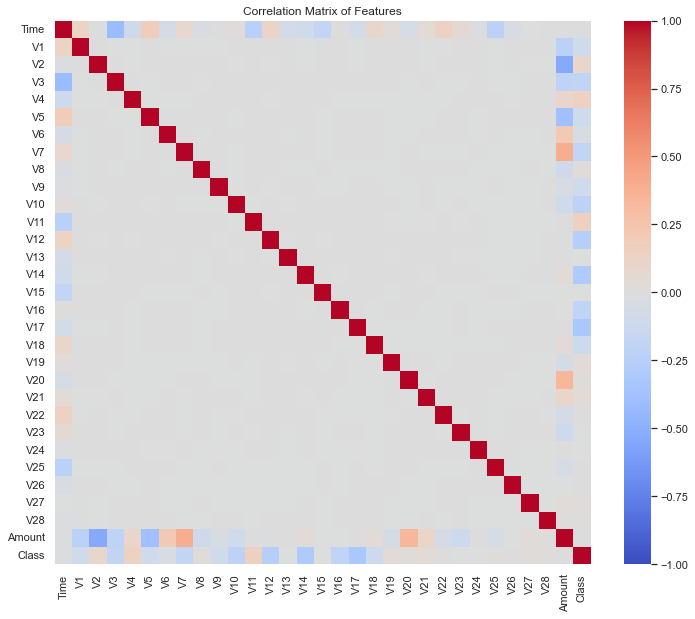

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of fraudulent and non-fraudulent transactions
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

# Distribution of transaction amount
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of transaction time
plt.figure(figsize=(10,6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Transaction Time (in seconds)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Summary statistics for the Amount feature for both classes
amount_summary = data.groupby('Class')['Amount'].describe()

amount_summary


In [3]:
from sklearn.preprocessing import StandardScaler

# Standardize the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Display the first few rows of the modified dataset
data_head = data.head()

data_head


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [4]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Check the distribution of classes in the training, validation, and test sets
train_class_distribution = y_train.value_counts(normalize=True)
val_class_distribution = y_val.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

train_class_distribution, val_class_distribution, test_class_distribution


(0    0.998275
 1    0.001725
 Name: Class, dtype: float64,
 0    0.998268
 1    0.001732
 Name: Class, dtype: float64,
 0    0.998268
 1    0.001732
 Name: Class, dtype: float64)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize a dictionary to store the classification reports and AUC-ROC scores for each strategy
evaluation_metrics = {}

# 1. Baseline Model
# Initialize the Logistic Regression model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
baseline_model.fit(X_train, y_train)

# Predict the target for the validation set
y_val_pred = baseline_model.predict(X_val)

# Calculate the classification report and AUC-ROC score for the validation set
classification_rep = classification_report(y_val, y_val_pred, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)
auc_roc = roc_auc_score(y_val, y_val_pred)

# Store the evaluation metrics for the baseline model
evaluation_metrics['Baseline'] = {
    'Classification Report': classification_rep,
    'AUC-ROC Score': auc_roc
}

evaluation_metrics['Baseline']


{'Classification Report': {'Non-Fraudulent': {'precision': 0.9993202381510478,
   'recall': 0.9996717236851361,
   'f1-score': 0.999495950016997,
   'support': 42647},
  'Fraudulent': {'precision': 0.7627118644067796,
   'recall': 0.6081081081081081,
   'f1-score': 0.6766917293233082,
   'support': 74},
  'accuracy': 0.9989934692539969,
  'macro avg': {'precision': 0.8810160512789137,
   'recall': 0.8038899158966222,
   'f1-score': 0.8380938396701526,
   'support': 42721},
  'weighted avg': {'precision': 0.9989103924157635,
   'recall': 0.9989934692539969,
   'f1-score': 0.9989367984912524,
   'support': 42721}},
 'AUC-ROC Score': 0.8038899158966221}

In [6]:
from sklearn.utils import resample

# 3. Undersampling
# Randomly remove samples from the majority class in the training set to balance the class distribution
X_train_majority = X_train[y_train == 0]
X_train_minority = X_train[y_train == 1]

# Undersample the majority class
X_train_majority_undersampled = resample(X_train_majority, 
                                         replace=False, 
                                         n_samples=len(X_train_minority), 
                                         random_state=42)

# Concatenate the minority class samples and the undersampled majority class samples
X_train_undersampled = pd.concat([X_train_majority_undersampled, X_train_minority])
y_train_undersampled = y_train[X_train_undersampled.index]

# Initialize the Logistic Regression model
undersampling_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the undersampled training set
undersampling_model.fit(X_train_undersampled, y_train_undersampled)

# Predict the target for the validation set
y_val_pred_undersampled = undersampling_model.predict(X_val)

# Calculate the classification report and AUC-ROC score for the validation set
classification_rep_undersampled = classification_report(y_val, y_val_pred_undersampled, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)
auc_roc_undersampled = roc_auc_score(y_val, y_val_pred_undersampled)

# Store the evaluation metrics for the undersampling model
evaluation_metrics['Undersampling'] = {
    'Classification Report': classification_rep_undersampled,
    'AUC-ROC Score': auc_roc_undersampled
}

evaluation_metrics['Undersampling']


{'Classification Report': {'Non-Fraudulent': {'precision': 0.9997825456654102,
   'recall': 0.9702675451966141,
   'f1-score': 0.984803950734813,
   'support': 42647},
  'Fraudulent': {'precision': 0.04876219054763691,
   'recall': 0.8783783783783784,
   'f1-score': 0.09239516702203271,
   'support': 74},
  'accuracy': 0.9701083776128836,
  'macro avg': {'precision': 0.5242723681065236,
   'recall': 0.9243229617874962,
   'f1-score': 0.5385995588784228,
   'support': 42721},
  'weighted avg': {'precision': 0.9981352175064553,
   'recall': 0.9701083776128836,
   'f1-score': 0.9832581477340698,
   'support': 42721}},
 'AUC-ROC Score': 0.9243229617874963}

In [7]:
# 4. Adjusting Class Weights
# Initialize the Logistic Regression model with class_weight='balanced'
class_weight_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model on the training set
class_weight_model.fit(X_train, y_train)

# Predict the target for the validation set
y_val_pred_class_weight = class_weight_model.predict(X_val)

# Calculate the classification report and AUC-ROC score for the validation set
classification_rep_class_weight = classification_report(y_val, y_val_pred_class_weight, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)
auc_roc_class_weight = roc_auc_score(y_val, y_val_pred_class_weight)

# Store the evaluation metrics for the class weight adjusting model
evaluation_metrics['Adjusting Class Weights'] = {
    'Classification Report': classification_rep_class_weight,
    'AUC-ROC Score': auc_roc_class_weight
}

evaluation_metrics['Adjusting Class Weights']


{'Classification Report': {'Non-Fraudulent': {'precision': 0.9997549920372412,
   'recall': 0.9568082162871949,
   'f1-score': 0.9778102609570823,
   'support': 42647},
  'Fraudulent': {'precision': 0.033578174186778595,
   'recall': 0.8648648648648649,
   'f1-score': 0.06464646464646465,
   'support': 74},
  'accuracy': 0.9566489548465625,
  'macro avg': {'precision': 0.5166665831120099,
   'recall': 0.9108365405760299,
   'f1-score': 0.5212283628017735,
   'support': 42721},
  'weighted avg': {'precision': 0.9980814103204991,
   'recall': 0.9566489548465625,
   'f1-score': 0.9762285067629628,
   'support': 42721}},
 'AUC-ROC Score': 0.9108365405760299}

In [8]:
# Evaluate the Baseline Model on the test set

# Predict the target for the test set
y_test_pred_baseline = baseline_model.predict(X_test)

# Calculate the classification report and AUC-ROC score for the test set
classification_rep_test_baseline = classification_report(y_test, y_test_pred_baseline, target_names=['Non-Fraudulent', 'Fraudulent'], output_dict=True)
auc_roc_test_baseline = roc_auc_score(y_test, y_test_pred_baseline)

classification_rep_test_baseline, auc_roc_test_baseline


({'Non-Fraudulent': {'precision': 0.9992500937382827,
   'recall': 0.9998124179328456,
   'f1-score': 0.9995311767463665,
   'support': 42648},
  'Fraudulent': {'precision': 0.84,
   'recall': 0.5675675675675675,
   'f1-score': 0.6774193548387097,
   'support': 74},
  'accuracy': 0.9990637142455877,
  'macro avg': {'precision': 0.9196250468691414,
   'recall': 0.7836899927502066,
   'f1-score': 0.8384752657925381,
   'support': 42722},
  'weighted avg': {'precision': 0.9989742520890942,
   'recall': 0.9990637142455877,
   'f1-score': 0.9989732376325337,
   'support': 42722}},
 0.7836899927502066)

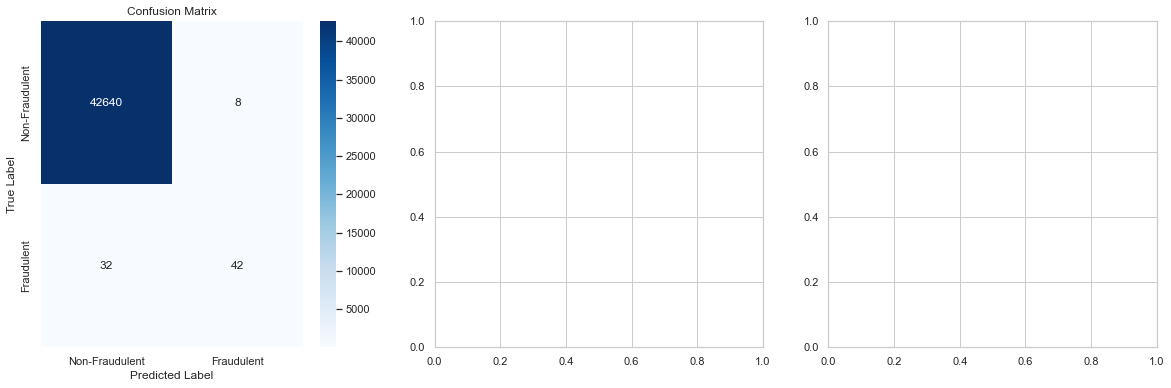

<Figure size 432x288 with 0 Axes>

In [10]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred_baseline)

# Calculate the ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Calculate the Precision-Recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, baseline_model.predict_proba(X_test)[:,1])
average_precision = average_precision_score(y_test, baseline_model.predict_proba(X_test)[:,1])

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot the Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].xaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])
axes[0].yaxis.set_ticklabels(['Non-Fraudulent', 'Fraudulent'])

# Plot the ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic')
axes[1].legend(loc="lower right")

# Plot the Precision-Recall Curve
axes[2].step(recall, precision, color='b', alpha=0.2, where='post')
axes[2].fill_between(recall, precision, alpha=0.2, color='b', step='post', label='AP = %0.2f' % average_precision)
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_ylim([0.0, 1.05])
axes[2].set_xlim([0.0, 1.0])
axes[2].set_title('Precision-Recall Curve')
axes[2].legend(loc="upper right")

plt.tight_layout()
plt.show()
